# Math 189 Project 1

In [30]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support

In [2]:
df = pd.DataFrame()
df = pd.read_csv('babies_cleaned.csv')

In [3]:
df.head(5)

,Unnamed: 0,bwt,gestation,parity,age,height,weight,smoke,std_bwt
0,1,120,284,0,27,62,100,0,0.030813
1,2,113,282,0,33,64,135,0,-0.351139
2,3,128,279,0,28,64,115,1,0.467329
3,4,123,999,0,36,69,190,0,0.194507
4,5,108,282,0,23,67,125,1,-0.623962


In [4]:
df.columns = ["count", "bwt", "gestation", "parity", "age", "height",
              "weight", "smoke", "std_bwt"]

In [5]:
df.head(5)

,count,bwt,gestation,parity,age,height,weight,smoke,std_bwt
0,1,120,284,0,27,62,100,0,0.030813
1,2,113,282,0,33,64,135,0,-0.351139
2,3,128,279,0,28,64,115,1,0.467329
3,4,123,999,0,36,69,190,0,0.194507
4,5,108,282,0,23,67,125,1,-0.623962


In [7]:
h_sm = df[df['smoke'] == 1]['std_bwt'].values
h_nsm = df[df['smoke'] == 0]['std_bwt'].values

In [8]:
st_sm = normaltest(h_sm)[0]
p_sm = normaltest(h_nsm)[1]
st_nsm = normaltest(h_sm)[0]
p_nsm = normaltest(h_nsm)[1]

In [9]:
if p_sm <= 0.05:
    is_n_sm = False
else:
    is_n_sm = True
    
if p_nsm <= 0.05:
    is_n_nsm = False
else:
    is_n_nsm = True

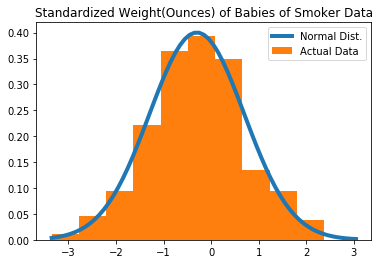

In [11]:
xs = np.arange(h_sm.min(), h_nsm.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(h_sm), np.std(h_sm))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(h_sm, normed=True, label='Actual Data');
plt.title('Standardized Weight(Ounces) of Babies of Smoker Data')
plt.legend();

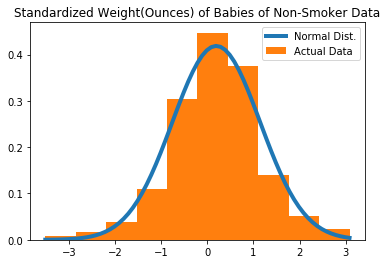

In [12]:
xs = np.arange(h_nsm.min(), h_nsm.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(h_nsm), np.std(h_nsm))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(h_nsm, normed=True, label='Actual Data');
plt.title('Standardized Weight(Ounces) of Babies of Non-Smoker Data')
plt.legend();

## Data Analysis

In [13]:
avg_h_sm = h_sm.mean()
avg_h_nsm = h_nsm.mean()

In [14]:
print('Average standard birth weight of smoking mothers is \t {:2.2f} ounces'.format(avg_h_sm))
print('Average standard birth weight of non-smokers is \t\t {:2.2f} ounces'.format(avg_h_nsm))

Average standard birth weight of smoking mothers is 	 -0.30 ounces
Average standard birth weight of non-smokers is 		 0.19 ounces


In [15]:
t_val = ttest_ind(h_sm, h_nsm)[0]
p_val = ttest_ind(h_sm, h_nsm)[1]

In [16]:
if p_val < 0.05:
    print('Data Science accomplished, there is a significant difference!')
else:
    print('There is NOT a significant difference!')

Data Science accomplished, there is a significant difference!


In [18]:
outcome_1, predictors_1 = patsy.dmatrices(formula_like = "std_bwt ~ smoke", data = df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [19]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                std_bwt   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     72.65
Date:                Fri, 13 Apr 2018   Prob (F-statistic):           4.64e-17
Time:                        08:23:57   Log-Likelihood:                -1652.7
No. Observations:                1190   AIC:                             3309.
Df Residuals:                    1188   BIC:                             3320.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1922      0.036      5.328      0.0

In [21]:
num_training = int(0.8 * len(df))
num_testing = int(0.2 * len(df))

In [26]:
BB_y = df['smoke']
BB_X = df['std_bwt']

In [27]:
BB_train_X = BB_X[0:num_training]
BB_train_y = BB_y[0:num_training]
BB_test_X = BB_X[num_training:(num_training+num_testing)]
BB_test_y = BB_y[num_training:(num_training+num_testing)]